# **Plot1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

results = [
    {
        "model": "albert-base-v2",
        "eval_accuracy": 0.9243119266055045,
        "train_runtime": 2501.4015,   # 秒
    },
    {
        "model": "bert-base-uncased",
        "eval_accuracy": 0.9231651376146789,
        "train_runtime": 2702.7464,
    },
    {
        "model": "distilbert-base-uncased",
        "eval_accuracy": 0.9094063692747706,
        "train_runtime": 1741.1033,
    },
    {
        "model": "roberta-base",
        "eval_accuracy": 0.9334862385321101,
        "train_runtime": 2964.0291,
    },
]

df = pd.DataFrame(results)
display(df)

,model,eval_accuracy,train_runtime
0,albert-base-v2,0.924312,2501.4015
1,bert-base-uncased,0.923165,2702.7464
2,distilbert-base-uncased,0.909406,1741.1033
3,roberta-base,0.933486,2964.0291


# **Plot2**

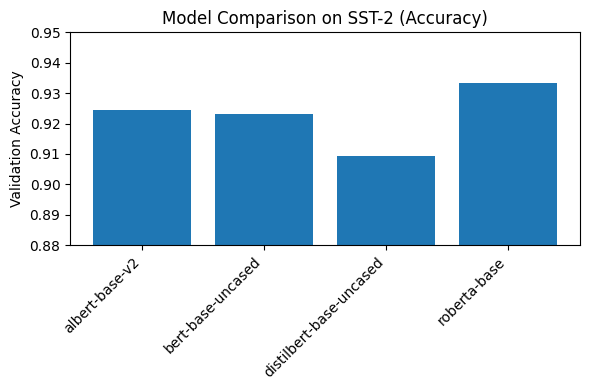

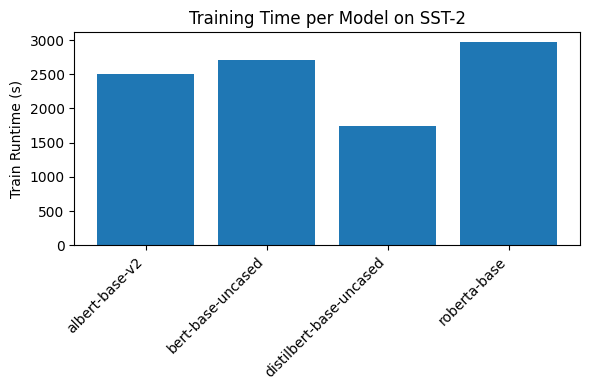

In [2]:
plt.figure(figsize=(6, 4))
plt.bar(df["model"], df["eval_accuracy"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison on SST-2 (Accuracy)")
plt.ylim(0.88, 0.95)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(df["model"], df["train_runtime"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Train Runtime (s)")
plt.title("Training Time per Model on SST-2")
plt.tight_layout()
plt.show()

# **Plot3**

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

sst2/train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

sst2/validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

sst2/test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

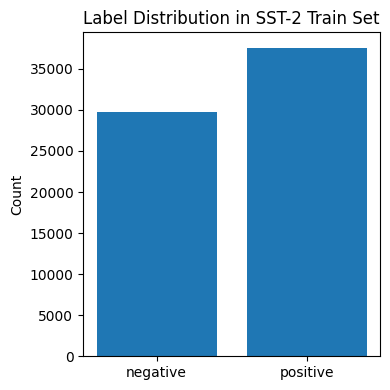

In [3]:
from datasets import load_dataset
from collections import Counter

task = "sst2"
raw_datasets = load_dataset("glue", task)
train_ds = raw_datasets["train"]

label_ids = train_ds["label"]
label_counts = Counter(label_ids)
label_names = train_ds.features["label"].names  # ["negative", "positive"]

x_labels = [label_names[i] for i in range(len(label_names))]
y_counts = [label_counts[i] for i in range(len(label_names))]

plt.figure(figsize=(4, 4))
plt.bar(x_labels, y_counts)
plt.ylabel("Count")
plt.title("Label Distribution in SST-2 Train Set")
plt.tight_layout()
plt.show()